In [1]:
# Define the problem
problem_description = {
    "task": "Text-to-Image Generation",
    "input": "Text or image",
    "output": "Realistic images",
}

# Print the problem description
for key, value in problem_description.items():
    print(f"{key}: {value}")

task: Text-to-Image Generation
input: Text or image
output: Realistic images


In [2]:
# Classical libraries
import torch
import torch.nn as nn
from transformers import CLIPProcessor, CLIPModel  # Text processing
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [3]:
# Load CLIP model and processor for text embedding
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Example: Encode text
text = ["A beautiful sunset over the mountains"]
inputs = clip_processor(text=text, images=None, return_tensors="pt", padding=True)
text_features = clip_model.get_text_features(**inputs)  # Text embeddings
print("Text Embeddings Shape:", text_features.shape)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Text Embeddings Shape: torch.Size([1, 512])


100%|██████████| 170498071/170498071 [00:02<00:00, 79032253.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


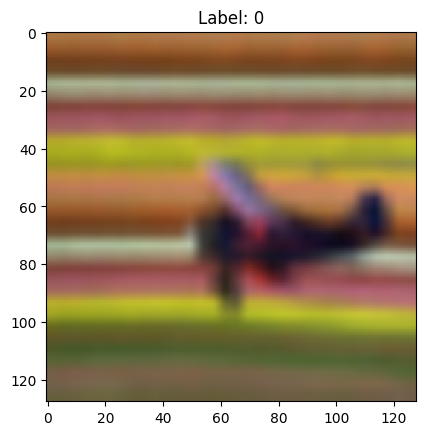

In [4]:
# Image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
])

# Load sample dataset (e.g., CIFAR-10)
dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# Visualize a sample image
image, label = next(iter(dataloader))
plt.imshow(image[0].permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Reverse normalization for visualization
plt.title(f"Label: {label[0]}")
plt.show()

In [5]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

In [6]:
# Define data directory
data_dir = "./data"

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match model input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root=data_dir, train=True, transform=transform, download=True)

# Display dataset size
print(f"Dataset Size: {len(dataset)}")

Files already downloaded and verified
Dataset Size: 50000


In [7]:
# Split dataset into training, validation, and test sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = int(0.1 * len(dataset))    # 10% validation
test_size = len(dataset) - train_size - val_size  # Remaining 10% for testing

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

# Display dataset split sizes
print(f"Training Set: {len(train_data)}")
print(f"Validation Set: {len(val_data)}")
print(f"Test Set: {len(test_data)}")


Training Set: 40000
Validation Set: 5000
Test Set: 5000


In [8]:
# Define data loaders
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Verify data loader
image, label = next(iter(train_loader))
print(f"Batch Image Shape: {image.shape}")
print(f"Batch Label Shape: {label.shape}")

Batch Image Shape: torch.Size([32, 3, 128, 128])
Batch Label Shape: torch.Size([32])


In [9]:
# Load CLIP model and processor for text embeddings
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Example: Encode text descriptions
text_descriptions = ["A dog running on a beach", "A cat sitting on a sofa"]
inputs = clip_processor(text=text_descriptions, images=None, return_tensors="pt", padding=True)
text_features = clip_model.get_text_features(**inputs)  # Text embeddings

# Display text embeddings
print(f"Text Embeddings Shape: {text_features.shape}")


Text Embeddings Shape: torch.Size([2, 512])


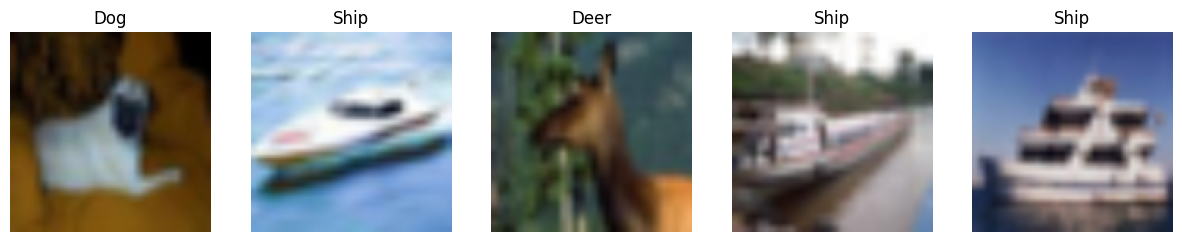

In [10]:
# Define label mapping (CIFAR-10)
labels_map = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 4: "Deer", 
              5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

# Plot a batch of images
def plot_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx].permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Reverse normalization
        ax.set_title(labels_map[labels[idx].item()])
        ax.axis("off")
    plt.show()

# Get a batch of images and labels
images, labels = next(iter(train_loader))
plot_images(images[:5], labels[:5])